In [1]:
import numpy as np
import matplotlib.pyplot as plt
import viz_tools

plt.rcParams.update({
    "text.usetex": True,          # Use LaTeX for all text
    "font.family": "serif",       # Use serif font (LaTeX default)
    "font.size": 20,              # Font size
})

In [2]:
def initial_condition(x):
    return 4 * x / (1 + x**2)**3 * np.exp(-x**2)

In [3]:
x_min, x_max = -5, 5
x_steps = 2000
dx = (x_max - x_min) / (x_steps - 1)

t_min, t_max = 0, 0.5
t_steps = 1000
dt = (t_max - t_min) / (t_steps - 1)

x = np.linspace(x_min, x_max, x_steps)

# nus = [0.0]  # Viscosity coefficients to simulate
# nu = 0.00  # Viscosity coefficient

# plt.title("Initial Condition")
# plt.plot(x, u[0, :])
# plt.xlabel("x")
# plt.ylabel("u(x,0)")
# plt.show()

In [4]:
def rhs(u, nu):
    du_dx = np.zeros((1, x_steps))
    du_dx_dx = np.zeros((1, x_steps))

    for i in range(1, x_steps - 1):
        du_dx[0, i] = (u[i + 1] ** 2 - u[i - 1] ** 2) / (4 * dx)
        du_dx_dx[0, i] = (u[i + 1] - 2 * u[i] + u[i - 1]) / (dx ** 2)

    udu_dx = np.zeros((1, x_steps))
    for i in range(1, x_steps - 1):
        udu_dx[0, i] = du_dx[0, i] + nu * du_dx_dx[0, i]

    return udu_dx

In [5]:
results = []

rk4 = True
for nu in [0.0, 0.001, 0.01]:
    u = np.zeros((t_steps, x_steps))
    u[0, :] = initial_condition(x)
    i = 1
    for j in range(1, t_steps):
        if rk4:
            k1 = rhs(u[j-1, :], nu)
            k2 = rhs(u[j-1, :] + 0.5 * dt * k1[0, :], nu)
            k3 = rhs(u[j-1, :] + 0.5 * dt * k2[0, :], nu)
            k4 = rhs(u[j-1, :] + dt * k3[0, :], nu)

            u[j, :] = u[j-1, :] + (dt / 6.0) * (k1[0, :] + 2*k2[0, :] + 2*k3[0, :] + k4[0, :])
        else:
            u[j, :] = u[j-1, :] + rhs(u[j-1, :], nu) * dt
    
    results.append((nu, u))

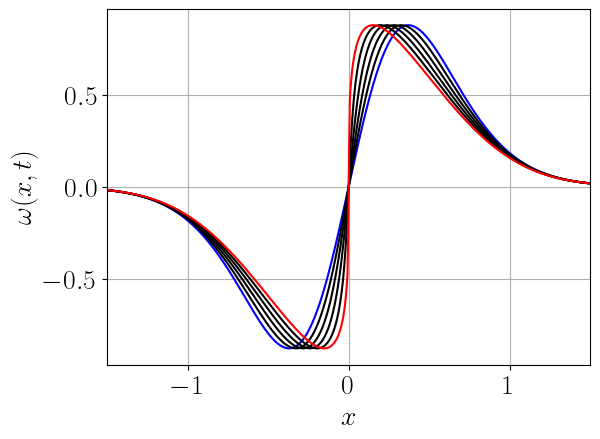

In [6]:
nu, u = results[0]  # Select the result for nu=0.00 for plotting
times_to_plot = [0.0, 0.05, 0.1, 0.15, 0.2, 0.25]
indices_to_plot = [int(t / dt) for t in times_to_plot]
# plt.figure(figsize=(10, 6))

for idx in indices_to_plot:
    if idx == 0:
        color = 'blue'
    elif idx == indices_to_plot[-1]:
        color = 'red'
    else:
        color = 'black'
    plt.plot(x, u[idx, :], color=color)

plt.xlim(-1.5, 1.5)
# plt.ylim(-2, 2)
plt.xlabel(r"$x$")
plt.ylabel(r"$\omega(x,t)$")
plt.grid()
plt.tight_layout()
plt.savefig("plots/burgers/burgers_finite.pdf", bbox_inches='tight')
plt.show()

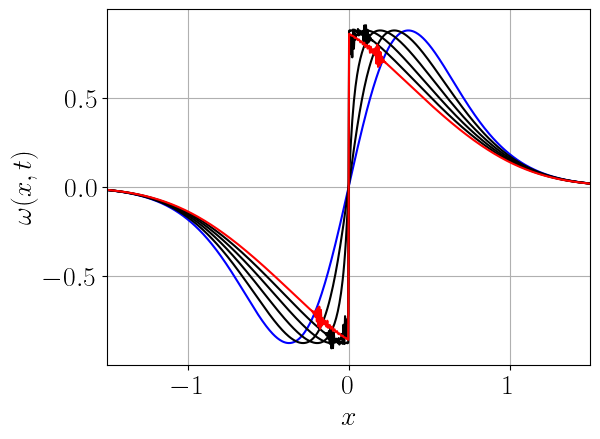

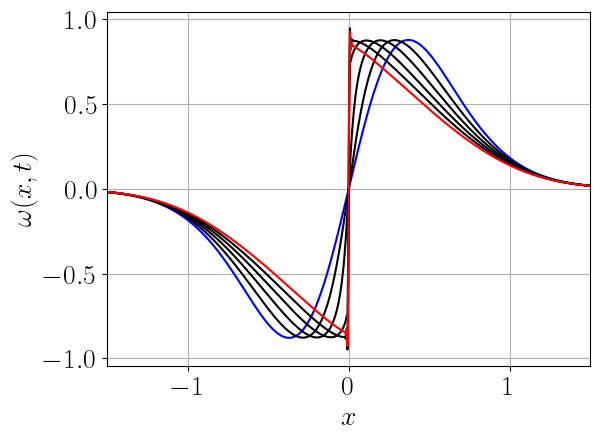

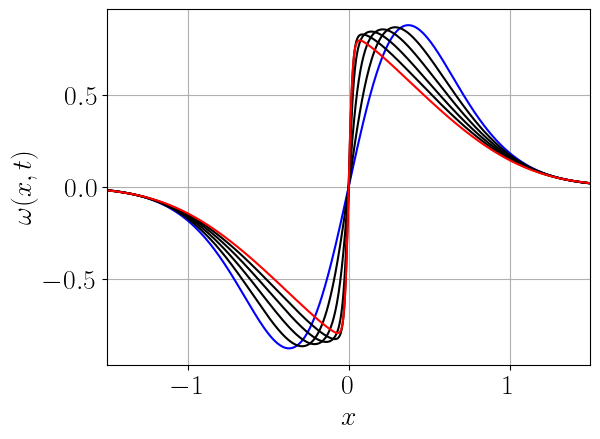

In [7]:
# plot profile at t in [0.0, 0.5, 1.5, 2.0, 2.5]

for i in range(len(results)):
    nu, u = results[i]

    times_to_plot = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]
    indices_to_plot = [int(t / dt) for t in times_to_plot]
    # plt.figure(figsize=(10, 6))

    for idx in indices_to_plot:
        if idx == 0:
            color = 'blue'
        elif idx == indices_to_plot[-1]:
            color = 'red'
        else:
            color = 'black'
        plt.plot(x, u[idx, :], color=color)

    plt.xlim(-1.5, 1.5)
    # plt.ylim(-2, 2)
    plt.xlabel(r"$x$")
    plt.ylabel(r"$\omega(x,t)$")
    plt.grid()
    plt.tight_layout()
    plt.savefig(f"plots/burgers/burgers_finite_{nu}.pdf", bbox_inches='tight')
    plt.show()

[0.0005005 0.0005005 0.0005005 0.0005005 0.0005005 0.0005005 0.0005005
 0.0005005 0.0005005 0.0005005 0.0005005 0.0005005 0.0005005 0.0005005
 0.0005005 0.0005005 0.0005005 0.0005005 0.0005005 0.0005005 0.0005005
 0.0005005 0.0005005 0.0005005 0.0005005 0.0005005 0.0005005 0.0005005
 0.0005005 0.0005005 0.0005005 0.0005005 0.0005005 0.0005005 0.0005005
 0.0005005 0.0005005 0.0005005 0.0005005 0.0005005 0.0005005 0.0005005
 0.0005005 0.0005005 0.0005005 0.0005005 0.0005005 0.0005005 0.0005005
 0.0005005 0.0005005 0.0005005 0.0005005 0.0005005 0.0005005 0.0005005
 0.0005005 0.0005005 0.0005005 0.0005005 0.0005005 0.0005005 0.0005005
 0.0005005 0.0005005 0.0005005 0.0005005 0.0005005 0.0005005 0.0005005
 0.0005005 0.0005005 0.0005005 0.0005005 0.0005005 0.0005005 0.0005005
 0.0005005 0.0005005 0.0005005 0.0005005 0.0005005 0.0005005 0.0005005
 0.0005005 0.0005005 0.0005005 0.0005005 0.0005005 0.0005005 0.0005005
 0.0005005 0.0005005 0.0005005 0.0005005 0.0005005 0.0005005 0.0005005
 0.000

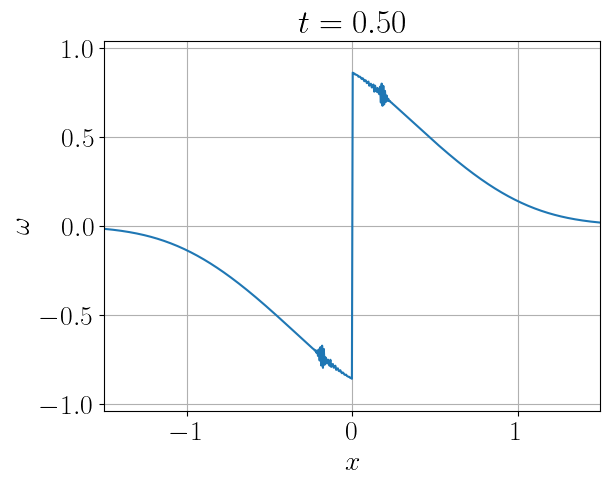

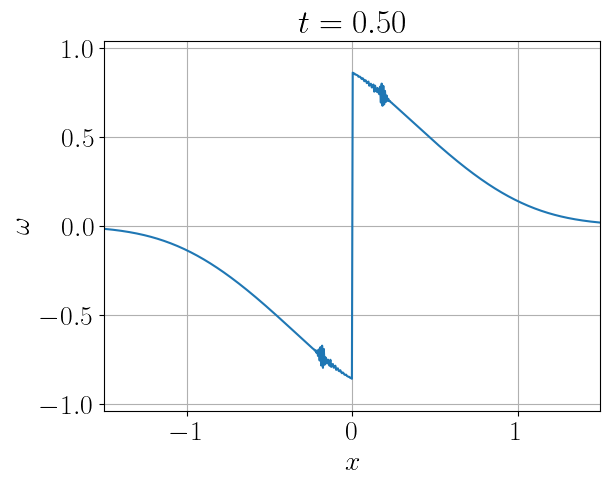

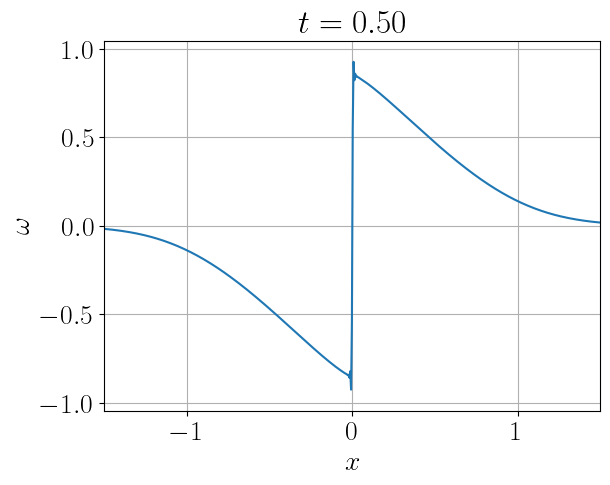

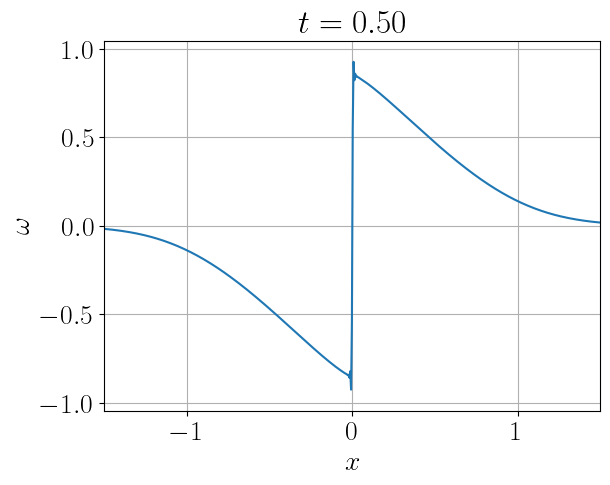

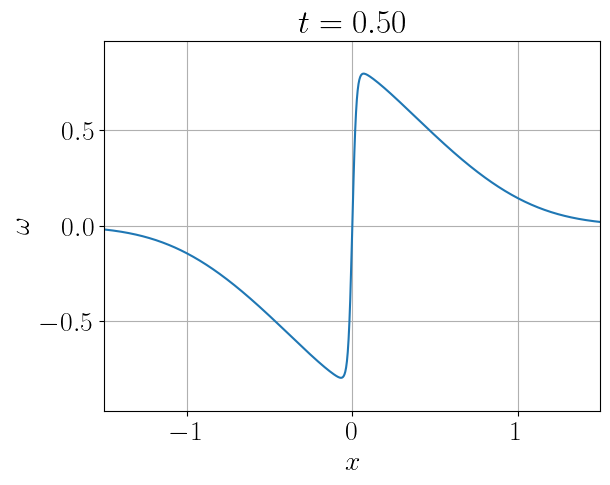

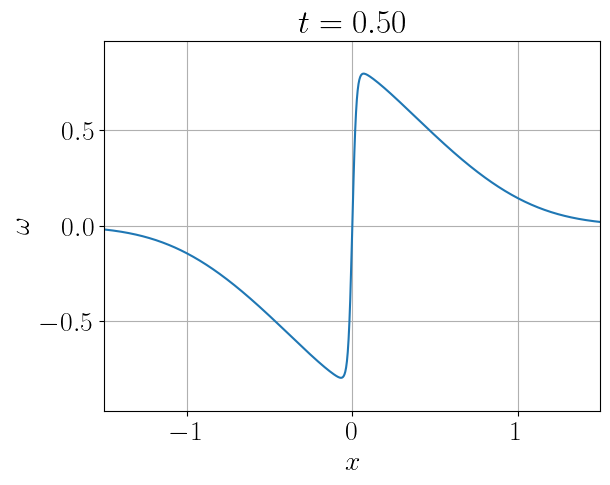

In [8]:
for i in range(len(results)):
    nu, u = results[i]
    anim = viz_tools.anim_1D(x, u.T, np.arange(t_steps) * dt, True, (-1.5, 1.5), (-1.2, 1.2), f'plots/burgers/burgers_finite_vid_{nu}', 'mp4')
    anim = viz_tools.anim_1D(x, u.T, np.arange(t_steps) * dt, True, (-1.5, 1.5), (-1.2, 1.2), f'plots/burgers/burgers_finite_vid_{nu}', 'gif')